In [87]:
%matplotlib notebook

# Dependencies
import os
import sys
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle, islice
import shutil
pd.options.mode.chained_assignment = None  # default='warn'

In [88]:
# Set directory file paths
demo_path = os.path.join(".", "Group_Work/Charleen")
country_pop_path = os.path.join(".", "Output/Demographic", "country_pop_2010-17.csv")
state_pop_path = os.path.join(".", "Output/Demographic", "state_pop_2010-17.csv")
state_co_path = os.path.join(".", "Output/Business", "state_co_ttl_2012-16.csv")
state_crime_path = os.path.join(".", "Output/Crime", "CrimeDataFinal.csv")
all_demo_path = os.path.join(".", "Output/Demographic", "state_demo_2017.csv")
error_path = os.path.join(".", "Output", "data_analysis_error.txt")

# print(f'{country_pop_path}, {state_pop_path}')

In [3]:
# Read population data and select only 2017
state_pop_data = pd.read_csv(state_pop_path, index_col=0)
all_data_df = state_pop_data[["State", "2017", "2016", "2015"]].rename(columns={"2017": "Pop_2017", "2016": "Pop_2016", "2015": "Pop_2015"})
all_data_df.count()


State       51
Pop_2017    51
Pop_2016    51
Pop_2015    51
dtype: int64

In [4]:
# Read company data and select only 2016 (most recent)
state_co_data = pd.read_csv(state_co_path, index_col=0)
state_co_df = state_co_data[["State", "2016_#Companies"]].rename(columns={"2016_#Companies": "Co_2016"})
# Merge data by state
all_data_df = pd.merge(all_data_df, state_co_df, how='inner', on='State')
all_data_df.count()



State       51
Pop_2017    51
Pop_2016    51
Pop_2015    51
Co_2016     51
dtype: int64

In [5]:
# Read all files from directory - Output/Demographic folder
xList = [x for x in os.listdir(demo_path)]

# Open text file in APPEND mode (a, r - read, w -write)
with open(error_path, "a") as xfile:
    
    # Loop thru the file list and write info to opened text file if criteria are met
    for x in xList:                
        # If error, record exception
        try:
            # Split the extension from the path and normalise it to lowercase.
            ext = os.path.splitext(x)[-1].lower()
            excel = os.path.splitext(x)[0].lower()

            # If it's csv file, read to dataframe and merge as it loop
            if ext == ".csv": 
                demo_data = pd.read_csv(f'{demo_path}/{x}', index_col=0)
                # -------------------------------------------------------------------------------------------
                # Merge data by state
                all_data_df = pd.merge(all_data_df, demo_data, how='inner', on='State')

        except Exception as e:
            # Write error to text file if occurs
            xfile.write(f'****************************************************************************\n')
            xfile.write(f'### {x} ###\n')  # Write file name to text file            
            xfile.write("Exception occurred: {}".format(e) + "\n")  # Write error to text file

# Display merged result
all_data_df.count()

State                     51
Pop_2017                  51
Pop_2016                  51
Pop_2015                  51
Co_2016                   51
Edu_25+yrs_ttl13          51
25+yrs_<high_school_13    51
25+yrs_high_school_13     51
25+yrs_college_13         51
25+yrs_>B.S._13           51
Edu_25+yrs_ttl14          51
25+yrs_<high_school_14    51
25+yrs_high_school_14     51
25+yrs_college_14         51
25+yrs_>B.S._14           51
Edu_25+yrs_ttl15          51
25+yrs_<high_school_15    51
25+yrs_high_school_15     51
25+yrs_college_15         51
25+yrs_>B.S._15           51
Edu_25+yrs_ttl16          51
25+yrs_<high_school_16    51
25+yrs_high_school_16     51
25+yrs_college_16         51
25+yrs_>B.S._16           51
Edu_25+yrs_ttl17          51
25+yrs_<high_school_17    51
25+yrs_high_school_17     51
25+yrs_college_17         51
25+yrs_>B.S._17           51
                          ..
Black_14                  51
Native_14                 51
Asian_14                  51
Hawaiian_Other

In [6]:
# Read crime data and select only 2015 (most recent)
state_crime_data = pd.read_csv(state_crime_path, index_col=0).reset_index()
state_crime_data["State"] = state_crime_data.State.str.capitalize()
state_crime_df = state_crime_data[["State", "Crime 2015"]].rename(columns={"Crime 2015": "Crime_2015"}).astype(str)
state_crime_df.count()

State         51
Crime_2015    51
dtype: int64

In [7]:
# # Merge data by state
# all_data_df = pd.merge(all_data_df, state_crime_df, how="left", on='State')
# all_data_df.count()

In [8]:
# If exist, open output file & print result if error occurs
if os.path.exists(error_path):
    print(open(error_path).read())

In [9]:
all_df = all_data_df.reindex(columns=["State", "Pop_2017", "%_M_17", "%_F_17", "Ttl$_Households_17", "Households_Earnings%_17", "Mean_Earnings$_17", "Edu_25+yrs_ttl17", "25+yrs_<high_school_17", "25+yrs_high_school_17", "25+yrs_college_17", "25+yrs_>B.S._17", "All_Races_17", "White_17", "Black_17", "Native_17", "Asian_17", "Hawaiian_Other_17", "Other_17", "Mixed_Race_17", "Pop_2016", "Co_2016", "Pop_2015"])
all_df["Pop_2017"] = all_df["Pop_2017"].str.replace(",", "").astype(int)
all_df.head()

,State,Pop_2017,%_M_17,%_F_17,Ttl$_Households_17,Households_Earnings%_17,Mean_Earnings$_17,Edu_25+yrs_ttl17,25+yrs_<high_school_17,25+yrs_high_school_17,...,White_17,Black_17,Native_17,Asian_17,Hawaiian_Other_17,Other_17,Mixed_Race_17,Pop_2016,Co_2016,Pop_2015
0,Alabama,4874747,48.5,51.5,1856695,72.4,67093,3276637,14.7,30.9,...,68.4,26.5,0.5,1.3,0.0,1.4,1.8,"4,860,545",73976,"4,850,858"
1,Alaska,739795,52.3,47.7,252536,86.0,90061,475442,7.6,27.6,...,65.3,3.2,14.2,6.2,1.2,1.4,8.5,"741,522",17059,"737,979"
2,Arizona,7016270,49.7,50.3,2482311,74.7,74501,4516175,13.5,24.2,...,77.5,4.3,4.4,3.1,0.2,7.0,3.5,"6,908,642",106963,"6,802,262"
3,Arkansas,3004279,49.1,50.9,1147291,73.1,63854,1985770,14.4,34.3,...,77.3,15.4,0.7,1.4,0.2,2.5,2.4,"2,988,231",50511,"2,975,626"
4,California,39536653,49.7,50.3,12888128,80.6,96538,25950818,17.5,20.6,...,60.6,5.8,0.7,14.1,0.4,13.7,4.7,"39,296,476",751982,"39,032,444"


In [10]:
all_df["Edu%_25+yrs_ttl17"] = [round(((row["Edu_25+yrs_ttl17"]/row["Pop_2017"]) * 100),1) for i, row in all_df.iterrows()]
Demo_df = all_df[["State", "Pop_2017", "%_M_17", "%_F_17", "White_17", "Black_17", "Native_17", "Asian_17", 
                  "Hawaiian_Other_17", "Other_17", "Mixed_Race_17", "Ttl$_Households_17", 
                  "Households_Earnings%_17", "Mean_Earnings$_17", "Edu%_25+yrs_ttl17"]]
namesList = ["Population", "Male (%)", "Female (%)", "White (%)", "Black (%)", "Native Indian (%)", 
             "Asian (%)", "Hawaiian / Pacific Islander (%)", "Others (%)", "Mixed Race (%)", "Total Households", 
             "Households w/Earnings (%)", "Average Earnings ($)", "25+ yrs w/Education (%)"]
Demo_df.columns = Demo_df.columns[:1].tolist() + namesList

Demo_df["Average Earnings ($)"] = Demo_df["Average Earnings ($)"].map('{:,.2f}'.format)
Demo_df["Population"] = Demo_df["Population"].map('{:,.2f}'.format)
Demo_df["Total Households"] = Demo_df["Total Households"].map('{:,.2f}'.format)
# Save cleaned data to csv & display
# All demo 
Demo_df.to_csv(all_demo_path)
Demo_df.head()

,State,Population,Male (%),Female (%),White (%),Black (%),Native Indian (%),Asian (%),Hawaiian / Pacific Islander (%),Others (%),Mixed Race (%),Total Households,Households w/Earnings (%),Average Earnings ($),25+ yrs w/Education (%)
0,Alabama,"4,874,747.00",48.5,51.5,68.4,26.5,0.5,1.3,0.0,1.4,1.8,"1,856,695.00",72.4,"67,093.00",67.2
1,Alaska,"739,795.00",52.3,47.7,65.3,3.2,14.2,6.2,1.2,1.4,8.5,"252,536.00",86.0,"90,061.00",64.3
2,Arizona,"7,016,270.00",49.7,50.3,77.5,4.3,4.4,3.1,0.2,7.0,3.5,"2,482,311.00",74.7,"74,501.00",64.4
3,Arkansas,"3,004,279.00",49.1,50.9,77.3,15.4,0.7,1.4,0.2,2.5,2.4,"1,147,291.00",73.1,"63,854.00",66.1
4,California,"39,536,653.00",49.7,50.3,60.6,5.8,0.7,14.1,0.4,13.7,4.7,"12,888,128.00",80.6,"96,538.00",65.6


In [89]:
# Top 5 States with the most educated people
# Most businesses in 5 states
Demo_df = Demo_df.sort_values(by='25+ yrs w/Education (%)', ascending=False)
Demo_top = pd.DataFrame(Demo_df.iloc[0:5,:]).reset_index(drop=True)
Demo_top.drop(Demo_top.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13]],inplace=True, axis=1)
Demo_top


,State,25+ yrs w/Education (%)
0,Maine,71.9
1,West Virginia,71.2
2,Vermont,70.2
3,New Hampshire,70.0
4,Pennsylvania,69.4


In [102]:
Demo_top_df = Demo_top.rename(columns={"25+ yrs w/Education (%)": "Pct_Edu_Pop"}) # Demo_top.set_index("State")
Demo_top_df

,State,Pct_Edu_Pop
0,Maine,71.9
1,West Virginia,71.2
2,Vermont,70.2
3,New Hampshire,70.0
4,Pennsylvania,69.4


<IPython.core.display.Javascript object>


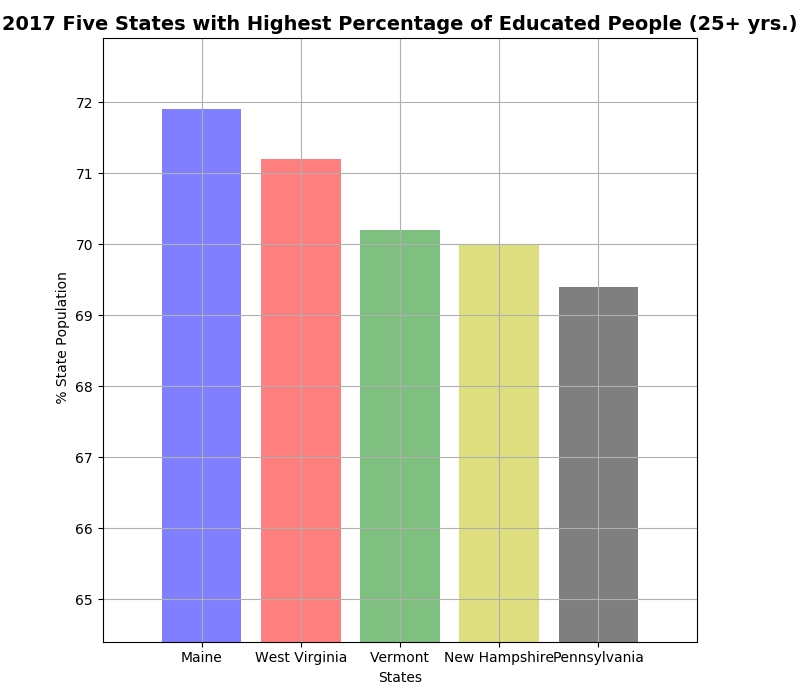

In [103]:
# % of population with educated people by state
Demo_top_df = Demo_top_df.set_index("State")
x_axis = np.arange(len(Demo_top_df))
y_axis = Demo_top_df["Pct_Edu_Pop"]

x_ticks = Demo_top_df.index
plt.figure(figsize=(8, 7))
plt.xticks(x_axis, x_ticks, rotation=0)
plt.grid()
# x_axis.color_cycle
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm']), None, len(Demo_top_df)))

plt.xlim(min(x_axis) -1, max(x_axis) + 1)
plt.ylim(min(y_axis) -5, max(y_axis) + 1)

plt.title("2017 Five States with Highest Percentage of Educated People (25+ yrs.)", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("States")
plt.ylabel(" % State Population")

plt.bar(x_axis, y_axis, color=my_colors, alpha=0.5, align="center")
plt.tight_layout()

plt.savefig("Images/Top%_Educated_State.png")
plt.show()

In [ ]:
# Read data
business_data = pd.read_csv(state_co_path, index_col=0)

# Most businesses in 5 states
business_df = business_data.sort_values(by='2016_#Companies', ascending=False)
business_df = pd.DataFrame(business_df.iloc[0:5,:])
business_df

In [ ]:
state_list = business_df["State"].values.tolist()
business_df = business_df.set_index("State")
# Create a list of the years that we will use as our x axis
years = [2012,2013,2014,2015,2016]

for item in state_list:
    num_firm_yr = business_df.loc[item,["2012_#Companies","2013_#Companies", "2014_#Companies", "2015_#Companies", "2016_#Companies"]]
    plt.plot(years, (num_firm_yr/1000), marker="o", label=item)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Top Five States with the Most Businesses")
plt.xlabel("Years")
plt.ylabel("Firms (Thousand)")
plt.xlim(round(min(years) - 1), round(max(years) + 1))
plt.ylim(min(business_df["2013_#Companies"]/1000) - 5, max(business_df["2016_#Companies"]/1000 + 5))
# Create a legend
plt.legend(title="States", loc='best')
        
# Save the plot and display it
plt.savefig("Images/Top5_States_Companies.png")
plt.show()



In [ ]:

# Least businesses in 5 states
business_least = business_data.sort_values(by='2016_#Companies', ascending=True)
business_least = pd.DataFrame(business_least.iloc[0:5,:])
business_least

In [ ]:
state2_list = business_least["State"].values.tolist()
business_least = business_least.set_index("State")
# Create a list of the years that we will use as our x axis
# years = [2012,2013,2014,2015,2016]

for item in state2_list:
    num_firm_yr = business_least.loc[item,["2012_#Companies","2013_#Companies", "2014_#Companies", "2015_#Companies", "2016_#Companies"]]
    plt.plot(years, (num_firm_yr/1000), marker="o", label=item)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Top Five States with the Least Businesses")
plt.xlabel("Years")
plt.ylabel("Firms (Thousand)")
plt.xlim(round(min(years) - 1), round(max(years) + 1))
plt.ylim(min(business_least["2013_#Companies"]/1000) - 1, max(business_least["2016_#Companies"]/1000 + 1))
# Create a legend
plt.legend(title="States", loc='best')
        
# Save the plot and display it
plt.savefig("Images/Least5_States_Companies.png")
plt.show()


## US Population Chart: 2017
* #### High-level outlook by region
* #### Mid-level outlook by state

In [ ]:
# Read population data and select only 2017
country_pop_data = pd.read_csv(country_pop_path, index_col=0)
ttl_pop_2017 = country_pop_data.iloc[0]["2017"]   #Get total US population in 2017
country_pop_df = country_pop_data.drop(country_pop_data.index[[0]])
country_pop_df["2017"] = country_pop_df ["2017"].replace({',': ''}, regex=True).astype(int)
country_pop_df["Pop%_2017"] = (country_pop_df["2017"]/country_pop_df["2017"].sum()) * 100  
country_pop_df


In [ ]:
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral", "green"]
# Tells matplotlib to seperate the "Python" section from the others
explode = ( 0, 0, 0.1, 0)

# Oval Shape
plt.rcParams["figure.figsize"] = (9,7)

# Build Pie Chart
plt.pie(country_pop_df["Pop%_2017"], explode=explode, labels=country_pop_df["Region"], colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140)

plt.title(f"2017 Total U.S. Population by Regions ({ttl_pop_2017})", fontdict={'fontsize': 14, 'fontweight': 'medium'})

# Save Figure
plt.savefig("Images/US_Region_Pop_2017.png")
plt.show()

In [ ]:
# If exist, delete error file
# if os.path.exists(error_path):
#     os.remove(error_path)